In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix,classification_report

In [10]:
diabetes_data=pd.read_csv("../Documents/diabetes.csv")
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
## number of true and false cases and their percentage
n_true = len(diabetes_data.loc[diabetes_data['Outcome'] == True])
n_false = len(diabetes_data.loc[diabetes_data['Outcome'] == False])
print("Number of true cases: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of false cases: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

Number of true cases: 268 (34.90%)
Number of false cases: 500 (65.10%)


### Number of true cases: 268 (34.90%)
### Number of false cases: 500 (65.10%)

In [34]:
from sklearn.model_selection import train_test_split

features_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
predicted_class = ['Outcome']

X = diabetes_data[features_cols].values      # Predictor feature columns (8 X m)
Y = diabetes_data[predicted_class]. values   # Predicted class (1=True, 0=False) (1 X m)
split_test_size = 0.30

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=split_test_size, random_state=52)

In [13]:
print("Original Diabetes True Values    : {0} ({1:0.2f}%)".format(len(diabetes_data.loc[diabetes_data['Outcome'] == 1]), (len(diabetes_data.loc[diabetes_data['Outcome'] == 1])/len(diabetes_data.index)) * 100))
print("Original Diabetes False Values   : {0} ({1:0.2f}%)".format(len(diabetes_data.loc[diabetes_data['Outcome'] == 0]), (len(diabetes_data.loc[diabetes_data['Outcome'] == 0])/len(diabetes_data.index)) * 100))
print("")
print("Training Diabetes True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Diabetes False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Diabetes True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Diabetes False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Diabetes True Values    : 268 (34.90%)
Original Diabetes False Values   : 500 (65.10%)

Training Diabetes True Values    : 192 (35.75%)
Training Diabetes False Values   : 345 (64.25%)

Test Diabetes True Values        : 76 (32.90%)
Test Diabetes False Values       : 155 (67.10%)



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


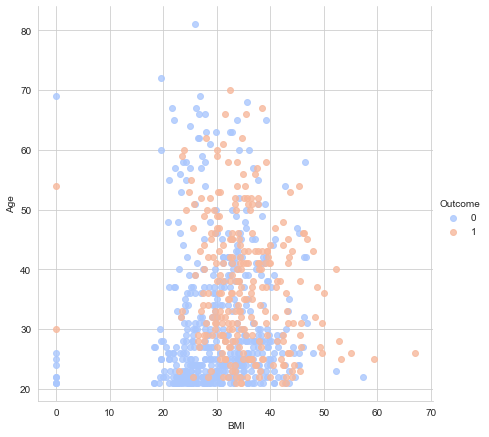

In [14]:
sns.set_style('whitegrid')
sns.lmplot('BMI','Age',data=diabetes_data, hue='Outcome',
           palette='coolwarm',height=6,aspect=1,fit_reg=False)

### K-mean clustering

In [35]:
kmeans=KMeans(n_clusters=2)
kmeans.fit(diabetes_data)
kmeans

KMeans(n_clusters=2)

In [16]:
kmeans.cluster_centers_

array([[  3.88391376, 115.26699834,  68.09784411,  17.6185738 ,
         32.21227197,  31.17363184,   0.43757048,  33.11442786,
          0.30182421],
       [  3.7030303 , 141.46060606,  72.78787879,  31.2       ,
        253.70909091,  34.98545455,   0.59724848,  33.7030303 ,
          0.52121212]])

In [17]:
def converter(cluster):
    if cluster=='Yes':
        return 1
    else:
        return 0
diabetes_data['Cluster'] = diabetes_data['Outcome'].apply(converter)
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Cluster
0,6,148,72,35,0,33.6,0.627,50,1,0
1,1,85,66,29,0,26.6,0.351,31,0,0
2,8,183,64,0,0,23.3,0.672,32,1,0
3,1,89,66,23,94,28.1,0.167,21,0,0
4,0,137,40,35,168,43.1,2.288,33,1,0


In [18]:
print("Confusion Matrix: \n" ,confusion_matrix(diabetes_data['Cluster'],kmeans.labels_))
print(classification_report(diabetes_data['Cluster'],kmeans.labels_))

Confusion Matrix: 
 [[603 165]
 [  0   0]]
              precision    recall  f1-score   support

           0       1.00      0.79      0.88       768
           1       0.00      0.00      0.00         0

    accuracy                           0.79       768
   macro avg       0.50      0.39      0.44       768
weighted avg       1.00      0.79      0.88       768



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## k-mean f1-score accuracy :  0.79

## Hierarchical Clustering

In [19]:
data = diabetes_data.drop('Outcome', axis = 1)
data


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Cluster
0,6,148,72,35,0,33.6,0.627,50,0
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,0
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,0


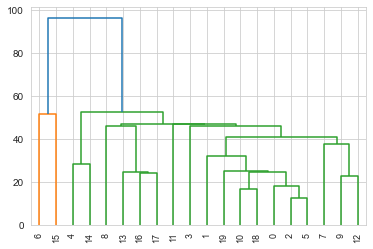

In [37]:
from scipy.cluster.hierarchy import linkage, dendrogram

merg = linkage(data.iloc[200:220,:],method = 'single')
dendrogram(merg, leaf_rotation = 90, leaf_font_size = 9)
plt.show()

In [21]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=2, affinity="euclidean",linkage="ward")
cluster = hc.fit_predict(data)
data['Label'] = cluster
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Cluster,Label
0,6,148,72,35,0,33.6,0.627,50,0,1
1,1,85,66,29,0,26.6,0.351,31,0,1
2,8,183,64,0,0,23.3,0.672,32,0,1
3,1,89,66,23,94,28.1,0.167,21,0,1
4,0,137,40,35,168,43.1,2.288,33,0,0
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,0
764,2,122,70,27,0,36.8,0.340,27,0,1
765,5,121,72,23,112,26.2,0.245,30,0,1
766,1,126,60,0,0,30.1,0.349,47,0,1


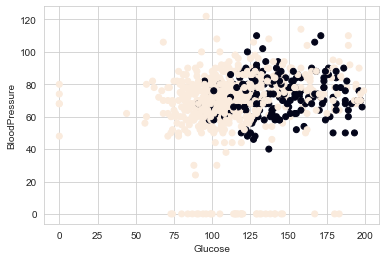

In [22]:
plt.scatter(data['Glucose'], data['BloodPressure'], c = cluster)
plt.xlabel('Glucose')
plt.ylabel('BloodPressure')
plt.show()

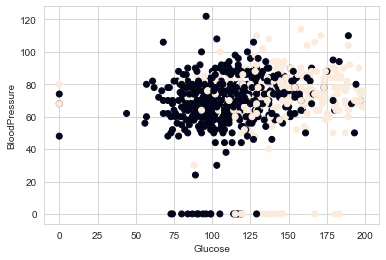

In [23]:
plt.scatter(diabetes_data['Glucose'], diabetes_data['BloodPressure'], c = diabetes_data['Outcome'])
plt.xlabel('Glucose')
plt.ylabel('BloodPressure')
plt.show()

In [26]:
# We compare our labels results with base data's result.
correct = []
for i in range(0,767):
    if data['Label'][i] == diabetes_data['Outcome'][i]:
        correct.append(1)
    else:
        correct.append(0)
correct[0:10] # -> if we find correctly 1, if not 0

[1, 0, 1, 0, 0, 0, 1, 0, 0, 1]

In [27]:
print("Hierarchical Clustering Accuracy : ", (correct.count(1)/data['Label'].size)*100)

Hierarchical Clustering Accuracy :  32.421875


## Hierarchical Clustering Accuracy :  0.32421875

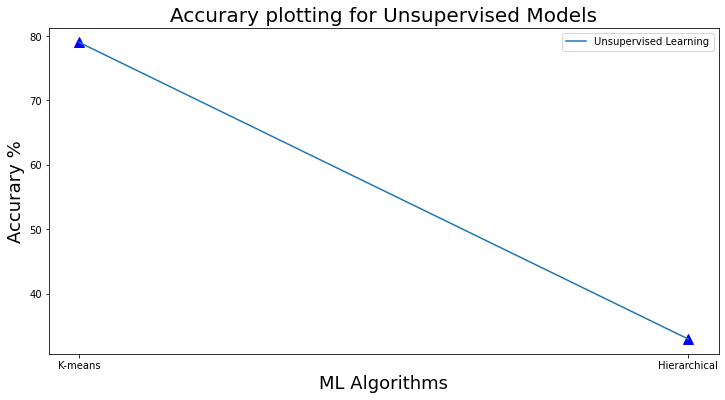

In [4]:
plt.figure(figsize=(12, 6))

x = ['K-means', 'Hierarchical']
y = [79, 33]

plt.plot(x,y, 'b^', markersize=10)

plt.xlabel("ML Algorithms", fontsize=18)
plt.ylabel("Accurary %", fontsize=18)

plt.plot(x,y,label = 'Unsupervised Learning')

plt.title("Accurary plotting for Unsupervised Models", fontsize=20)
plt.legend()
plt.show()